In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [2]:
dir = r"C:\Users\appenteng.adjepong\Desktop\Datasets\income.csv"
path = os.path.normpath(dir).replace("\\", "/")
path

'C:/Users/appenteng.adjepong/Desktop/Datasets/income.csv'

In [3]:
df = pd.read_csv(path)
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [4]:
X = df["Age"]
y = df["Income($)"]

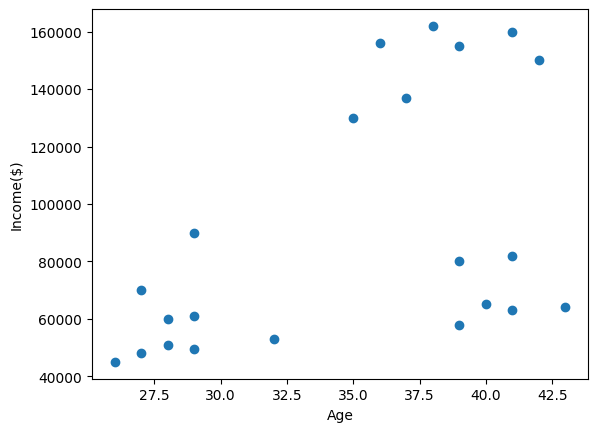

In [5]:
plt.scatter(X, y)
plt.xlabel("Age")
plt.ylabel("Income($)")
plt.show()

In [26]:
model = KMeans(n_clusters=3)
predictions = model.fit_predict(df[["Age", "Income($)"]])
predictions

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2])

In [27]:
df["Cluster"] = predictions
df.head()

,Name,Age,Income($),Cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


In [28]:
centers = model.cluster_centers_
centers

array([[0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ],
       [0.85294118, 0.2022792 ]])

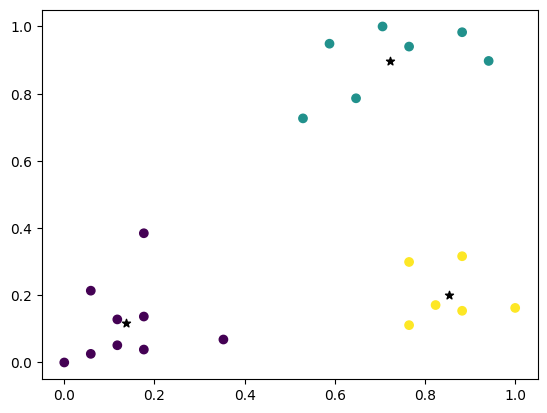

In [29]:
plt.scatter(df.Age, df["Income($)"], c=predictions, cmap="viridis")
plt.scatter(centers[:, 0], centers[:, 1], marker="*", color="k")

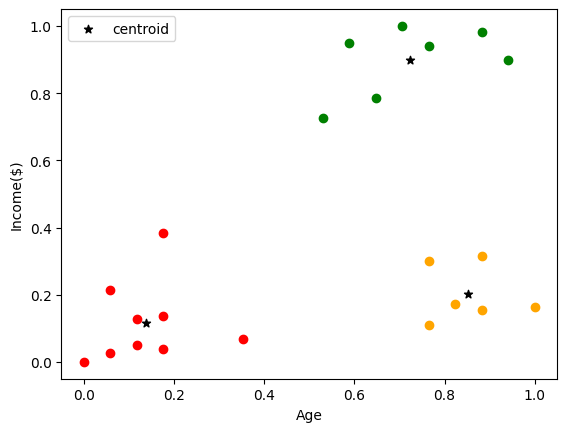

In [30]:
df1 = df[df.Cluster == 0]
df2 = df[df.Cluster == 1]
df3 = df[df.Cluster == 2]
plt.scatter(df1.Age, df1["Income($)"], color="red")
plt.scatter(df2.Age, df2["Income($)"], color="green")
plt.scatter(df3.Age, df3["Income($)"], color="orange")
plt.scatter(centers[:, 0], centers[:, 1], color="black", marker="*", label="centroid")
plt.xlabel("Age")
plt.ylabel("Income($)")
plt.legend()
plt.show()

In [38]:
scaler = MinMaxScaler()

scaler.fit(df[["Income($)"]])
df["Income($)"] = scaler.transform(df[["Income($)"]])

scaler.fit(df[["Age"]])
df["Age"] = scaler.transform(df[["Age"]])


In [32]:
df.head()

,Name,Age,Income($),Cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


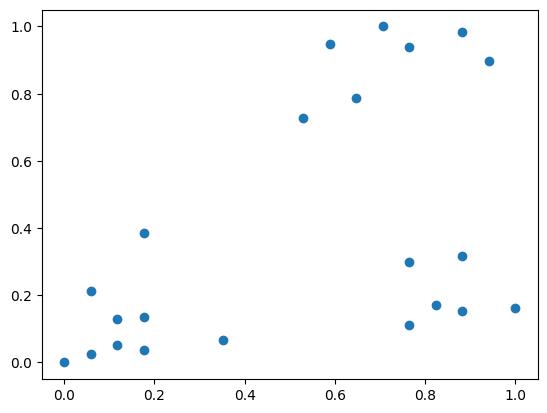

In [39]:
plt.scatter(df.Age, df["Income($)"])

In [41]:
model2 = KMeans(n_clusters=3)
predictions2 = model2.fit_predict(df[["Age", "Income($)"]])
predictions2

array([1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0])

In [42]:
df["Cluster"] = predictions2
df.head()

,Name,Age,Income($),Cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,2


In [44]:
centers = model2.cluster_centers_
centers

array([[0.85294118, 0.2022792 ],
       [0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ]])

In [45]:
df1 = df[df.Cluster == 0]
df2 = df[df.Cluster == 1]
df3 = df[df.Cluster == 2]

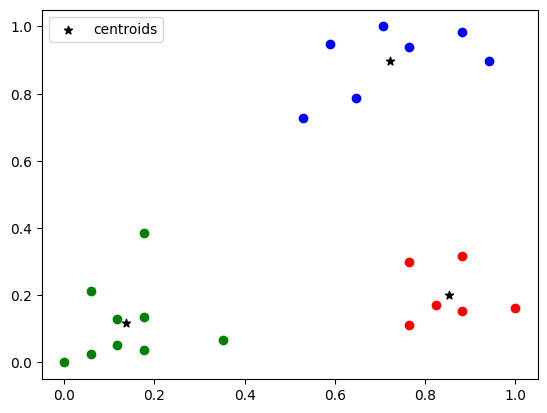

In [46]:
plt.scatter(df1.Age, df1["Income($)"], color="red")
plt.scatter(df2.Age, df2["Income($)"], color="green")
plt.scatter(df3.Age, df3["Income($)"], color= "blue")
plt.scatter(centers[:, 0], centers[:, 1], color="black", marker="*", label="centroids")
plt.legend()
plt.show()

In [18]:
squared_error_sum = []
k_range = range(1, 10)
for k in k_range:
    model = KMeans(n_clusters = k)
    model.fit(df[["Age", "Income($)"]])
    squared_error_sum.append(model.inertia_)

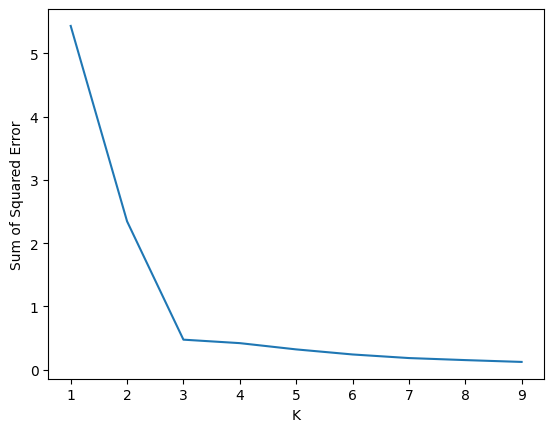

In [19]:
plt.plot(k_range, squared_error_sum)
plt.xlabel("K")
plt.ylabel("Sum of Squared Error")
plt.show()